In [1]:
import json
from datatypes.vessel import Vessel
from datatypes.track import Track
from dynamicSceneGenerator import DynamicSceneGenerator

from visualize import visualize_dynamic_scene_mov, visualize_camera_pose_in_dsg_mov, visualize_projections_mov, visualize_bounding_boxes_mov, visualize_distorted_bounding_boxes_mov
from MODSIM import create_and_place_simple_legacy_camera, project_all_points, create_all_bbs, tracks_to_json, vessels_to_json, project_all_points_from_json, create_all_bbs_from_json
from errorGenerator import ErrorGenerator



In [2]:
vehicle_characteristics_path = 'boats_in_fishtank/vehicle_characteristics.json'
dynamics_path = 'boats_in_fishtank/dynamics.json'
simulation_folder = './boats_in_fishtank/simulation/'

In [3]:
# Get vessels
with open(vehicle_characteristics_path, 'r') as f:
    vessel_dict = json.load(f)

# air_draft: int = 2, beam: int = 2, length: int = 4, label: str = "")
vessels = [Vessel(vesselID, length=vessel['length_m'], beam=vessel['width_m'], label=vessel['type']) for vesselID, vessel in vessel_dict.items()]

In [4]:
# Create dynamic scene with vessels

dsg = DynamicSceneGenerator(vessels)

In [5]:
# Load tracks 
with open(dynamics_path, 'r') as f:
    dynamics = json.load(f)

tracks = {vessel.id: Track() for vessel in vessels}

for t, positions in dynamics['time_s'].items():
    for vesselID, position in positions.items():
        x = position['center_position_m'][0]
        y = position['center_position_m'][1]
        z = 0
        heading_rad = position['heading_rad'] 
        time_stamp = float(t)
        tracks[vesselID].addPosition(x, y, z, heading_rad, time_stamp)

In [6]:
# Update each vessel in the scene with the correct track
for vessel in dsg.get_vessels():
    vessel.set_track(tracks[vessel.id])

In [7]:
vessels = dsg.get_vessels()

In [8]:
#tracks_to_json(vessels, simulation_folder)
#vessels_to_json(vessels, simulation_folder)

Moviepy - Building video ./boats_in_fishtank/simulation/dynamicScene.mp4.
Moviepy - Writing video ./boats_in_fishtank/simulation/dynamicScene.mp4



Moviepy - Done !
Moviepy - video ready ./boats_in_fishtank/simulation/dynamicScene.mp4


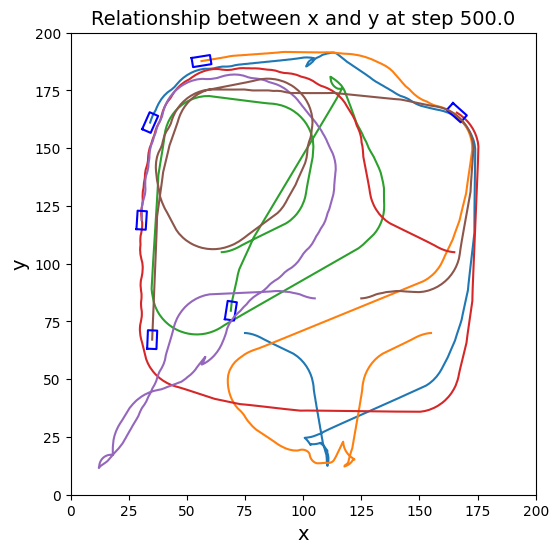

In [9]:
visualize_dynamic_scene_mov(vessels, folder_path=simulation_folder, fps=1, skip=10, max_duration=5000, y_x_lim=200) 

In [10]:
largest_radius = 100
path_centre = (100,100)
height = 60
camera = create_and_place_simple_legacy_camera(largest_radius, path_centre, height=height)

Moviepy - Building video ./boats_in_fishtank/simulation/camera_position.mp4.
Moviepy - Writing video ./boats_in_fishtank/simulation/camera_position.mp4



Moviepy - Done !
Moviepy - video ready ./boats_in_fishtank/simulation/camera_position.mp4


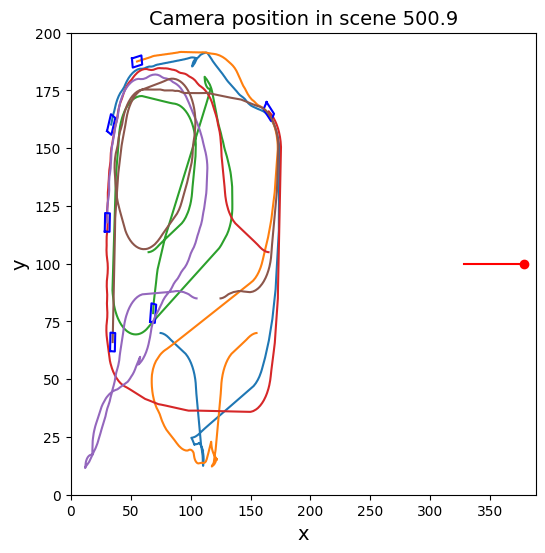

In [11]:
visualize_camera_pose_in_dsg_mov(camera, vessels, folder_path=simulation_folder, fps=3, skip=10, max_duration=100000, y_x_lim=200)

In [12]:
# all_projected_points = project_all_points(camera, vessels, writeToJson=True, folder_path=simulation_folder)
all_projected_points = project_all_points_from_json(camera, simulation_folder, writeToJson=True)


Moviepy - Building video ./boats_in_fishtank/simulation/projected_points.mp4.
Moviepy - Writing video ./boats_in_fishtank/simulation/projected_points.mp4



Moviepy - Done !
Moviepy - video ready ./boats_in_fishtank/simulation/projected_points.mp4


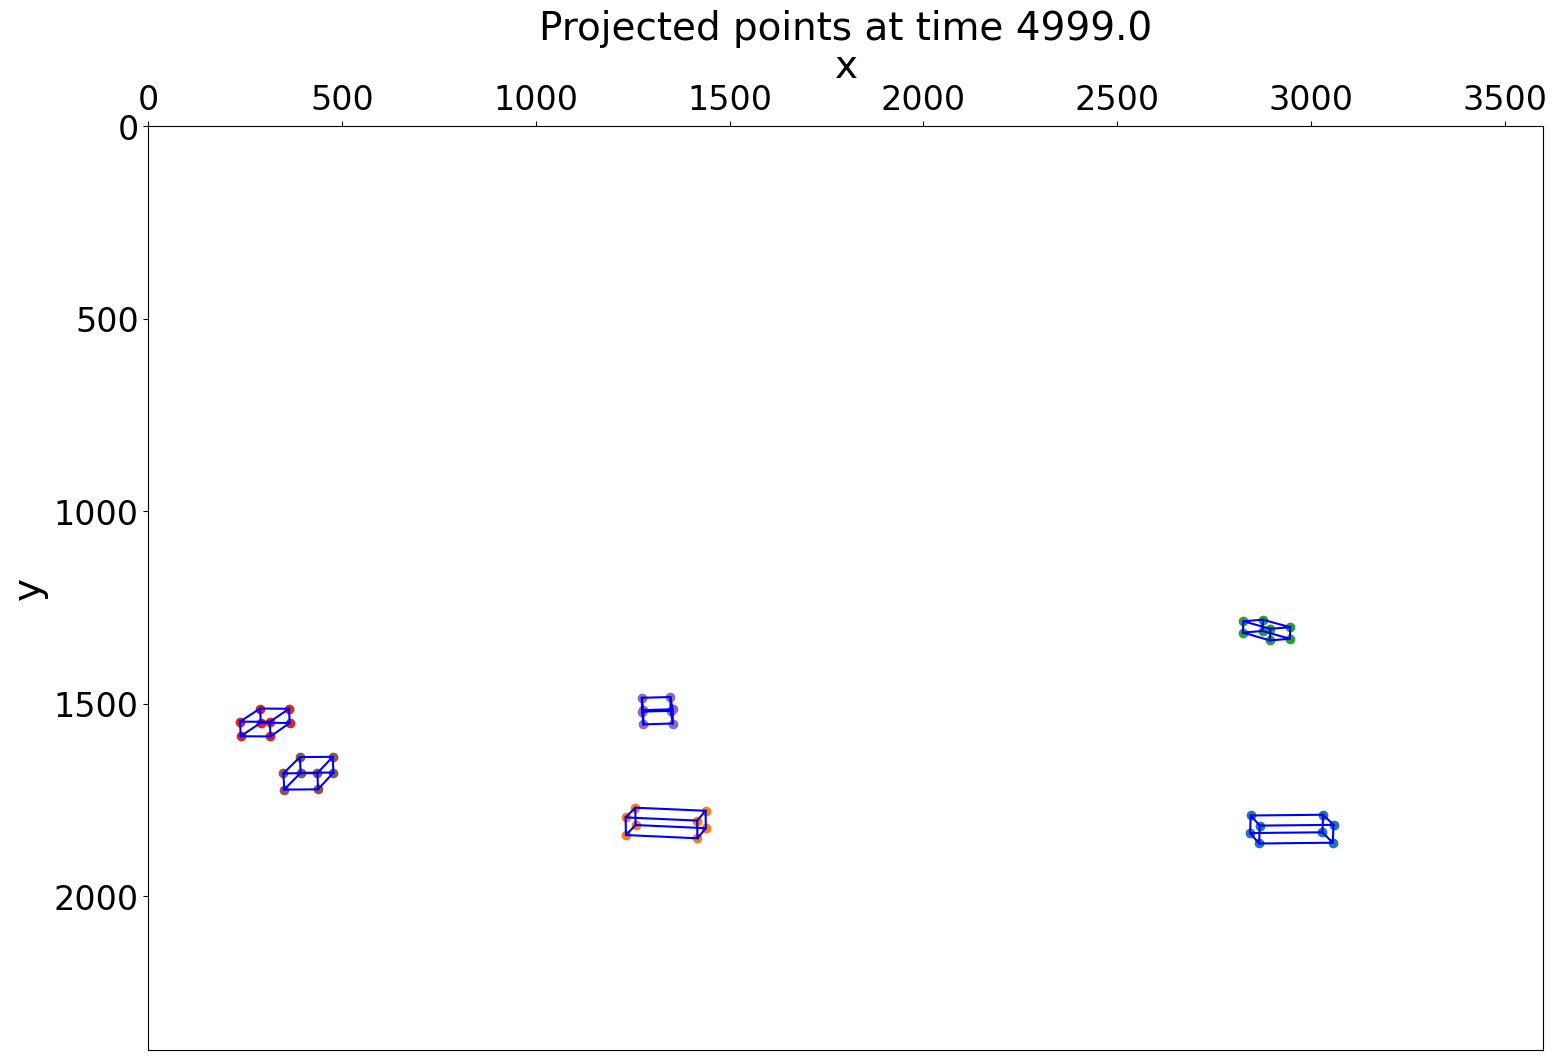

In [13]:
visualize_projections_mov(all_projected_points, camera.image_bounds, folder_path=simulation_folder, fps=3, skip=10, max_duration=100000)


In [8]:
# all_bbs=create_all_bbs(all_projected_points, writeToJson=True, folder_path=simulation_folder)
all_bbs = create_all_bbs_from_json(simulation_folder, occlusion=True, writeToJson=True)


Moviepy - Building video ./boats_in_fishtank/simulation/boundingBoxes.mp4.
Moviepy - Writing video ./boats_in_fishtank/simulation/boundingBoxes.mp4



Moviepy - Done !
Moviepy - video ready ./boats_in_fishtank/simulation/boundingBoxes.mp4


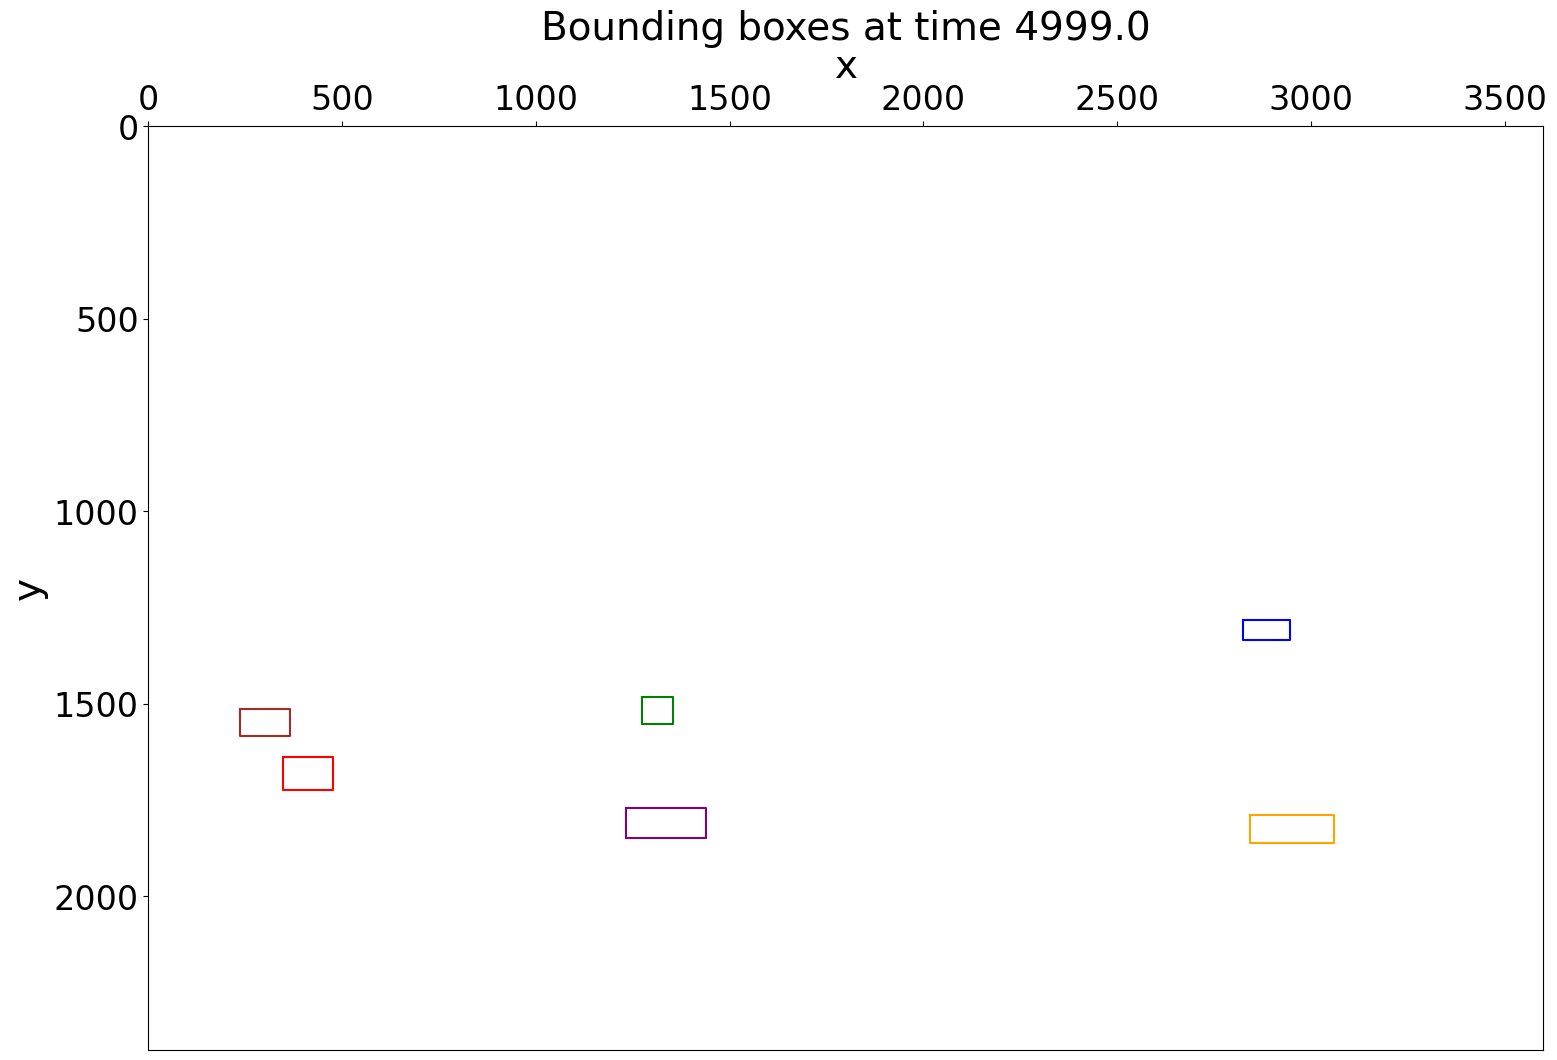

In [11]:
visualize_bounding_boxes_mov(all_bbs, camera.image_bounds, folder_path=simulation_folder, fps=3, skip=10, max_duration=100000)


In [12]:
path = 'detector_stats_config.yaml'
errorGenerator = ErrorGenerator(path)
errorBBs = errorGenerator.generate_all_error_BBs(all_bbs)

Moviepy - Building video ./boats_in_fishtank/simulation/distortedBoundingBoxes.mp4.
Moviepy - Writing video ./boats_in_fishtank/simulation/distortedBoundingBoxes.mp4



Moviepy - Done !
Moviepy - video ready ./boats_in_fishtank/simulation/distortedBoundingBoxes.mp4


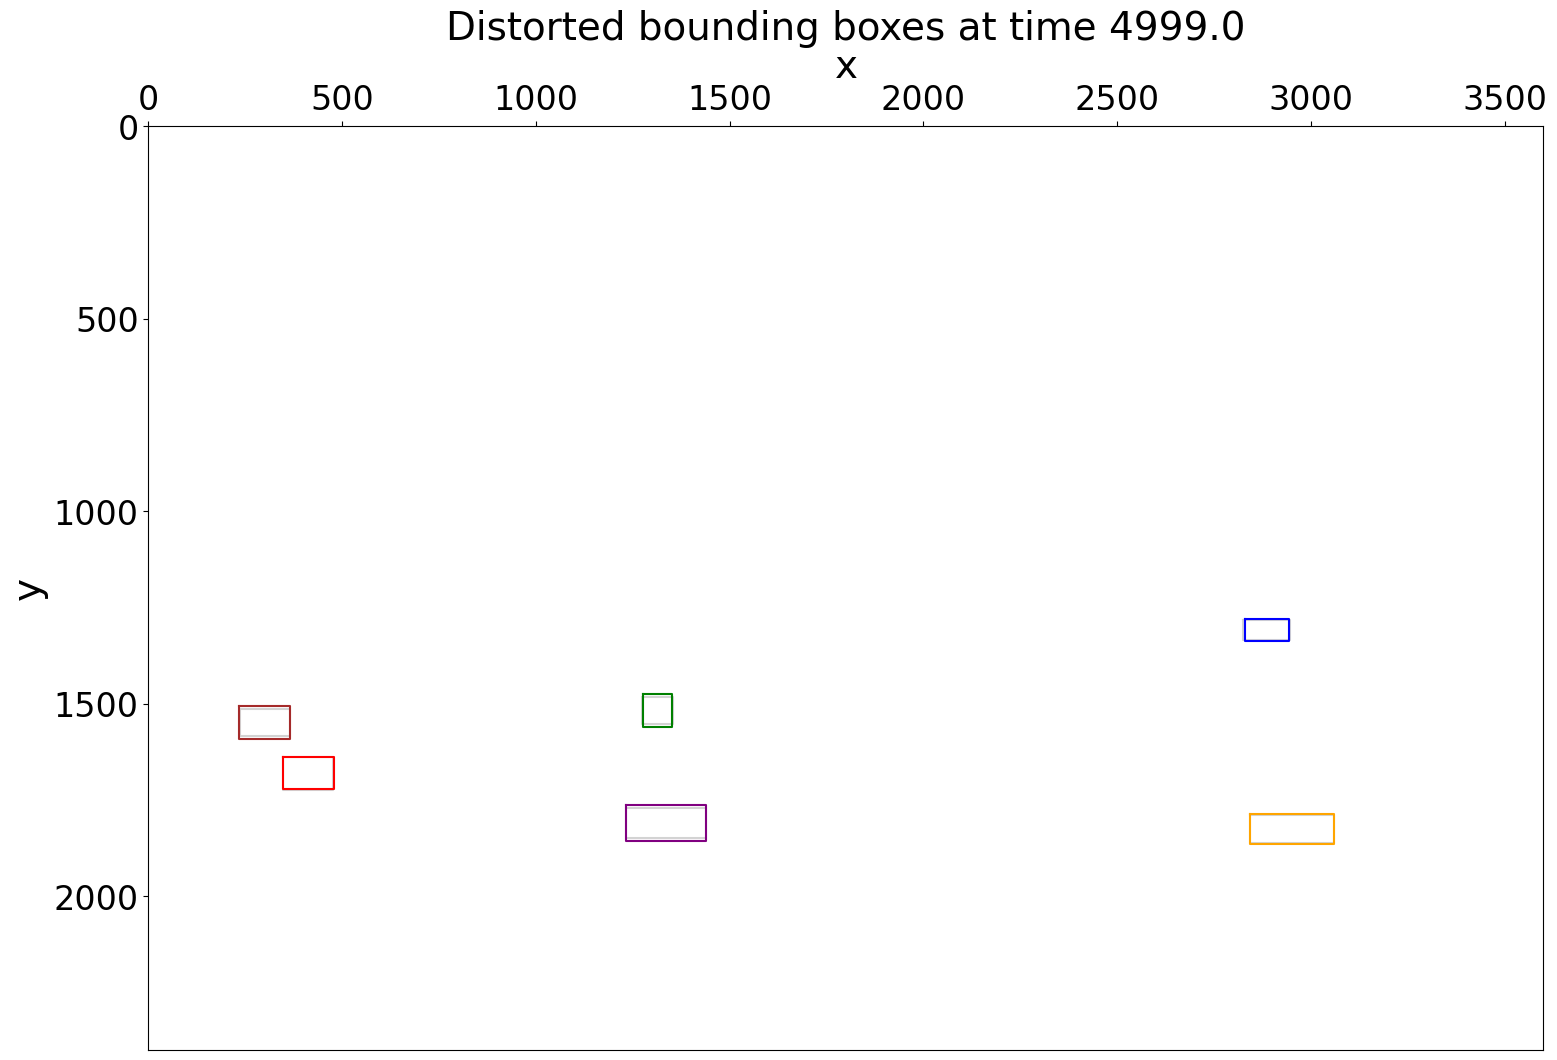

In [13]:
visualize_distorted_bounding_boxes_mov(errorBBs, camera.image_bounds, show_original_BBS=True, original_BBs=all_bbs, folder_path=simulation_folder, fps=3, skip=10, max_duration=100000)
